In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

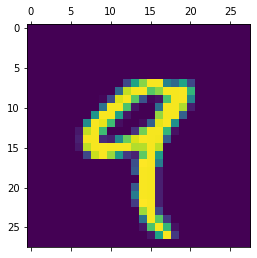

In [20]:
plt.matshow(X_train[4])

In [21]:
#scaling to get better accuracy
X_train = X_train / 255
X_test = X_test / 255

In [22]:
#flattening the matrix from 2d array to 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_test_flattened.shape

(10000, 784)

# Basic neural network with no hidden layers

In [24]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4713 - accuracy: 0.8773
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2533 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2638 - accuracy: 0.9281


[0.2637663185596466, 0.9280999898910522]

In [43]:
ypred=model.predict(X_test_flattened)
y_pred=[np.argmax(ypred[i])   for i in range(ypred.shape[0])]

In [46]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

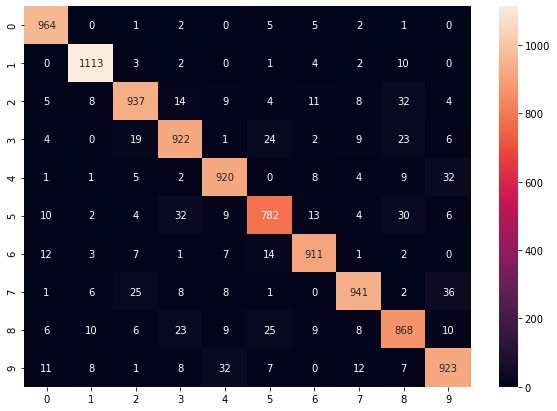

In [52]:
plt.figure(figsize = (10,7))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

# Deep learning with hidden layers

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2752 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1252 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9838


In [55]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9746


[0.07795622199773788, 0.9746000170707703]

In [54]:
ypred=model.predict(X_test_flattened)
y_pred=[np.argmax(ypred[i])   for i in range(ypred.shape[0])]

In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

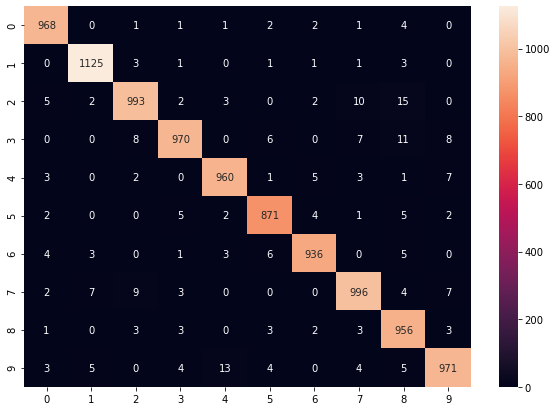

In [57]:
plt.figure(figsize = (10,7))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

Accuracy is increasing with more hidden layers. We can play around with epochs and batch_size too

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8,batch_size=25)

Epoch 1/8
2400/2400 [==============================] - 5s 2ms/step - loss: 0.2403 - accuracy: 0.9297
Epoch 2/8
2400/2400 [==============================] - 6s 2ms/step - loss: 0.1083 - accuracy: 0.9668
Epoch 3/8
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0771 - accuracy: 0.9762
Epoch 4/8
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0620 - accuracy: 0.9807
Epoch 5/8
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0482 - accuracy: 0.9846
Epoch 6/8
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0412 - accuracy: 0.9874
Epoch 7/8
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0336 - accuracy: 0.9884
Epoch 8/8
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0299 - accuracy: 0.9899


In [71]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9758


[0.10242902487516403, 0.9757999777793884]

Accuracy is increasing with more hidden layers. We can play around with epochs and batch_size too